In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data_df = pd.read_csv(clinical_trial_data_to_load)


# Combine the data into a single dataset
combined_pymasceuticals_df = pd.merge(clinical_trial_data_df, mouse_drug_data_df, how='outer', on='Mouse ID')


# Display the data table for preview
combined_pymasceuticals_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_volume_mean = combined_pymasceuticals_df.groupby(['Drug', 'Timepoint'],as_index=False)[['Tumor Volume (mm3)']].mean()
tumor_volume_mean.columns = ['Drug', 'Timepoint', 'Average Tumor Volume (mm3)']
tumor_volume_mean.head()

,Drug,Timepoint,Average Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
tumor_volume_sem = combined_pymasceuticals_df.groupby(['Drug', 'Timepoint'])[['Tumor Volume (mm3)']].sem().reset_index()
tumor_volume_sem.columns = ['Drug', 'Timepoint', 'Tumor Volume SEM (mm3)']
tumor_volume_sem.head()

,Drug,Timepoint,Tumor Volume SEM (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
#tumor_volume_sem = combined_pymasceuticals_df.groupby(['Drug', 'Timepoint'])[['Tumor Volume SEM (mm3)']].sem().reset_index()
# Convert to DataFrame

# Preview DataFrame

#tumor_volume_sem.head()

In [5]:
# Minor Data Munging to Re-Format the Data Frames
tumor_pivot = tumor_volume_mean.pivot(index='Timepoint', columns='Drug', values='Average Tumor Volume (mm3)')
# Preview that Reformatting worked
tumor_pivot_raw = tumor_pivot.reset_index()

In [6]:
tumor_pivot_raw.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [7]:
sem_pivot = tumor_volume_sem.pivot(index='Timepoint', columns='Drug', values='Tumor Volume SEM (mm3)')
sem_pivot_raw = sem_pivot.reset_index()

In [8]:
sem_pivot_raw

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
2,10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
3,15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
4,20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
5,25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
6,30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
7,35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
8,40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515
9,45,1.223977,0.902358,1.144427,1.453186,1.416363,1.351726,1.888586,1.226805,1.576556,1.003576


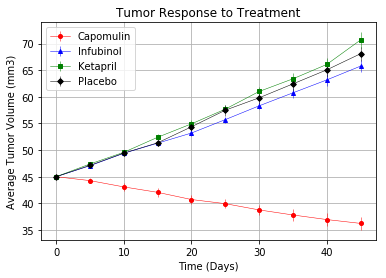

In [9]:
# Generate the Plot (with Error Bars)

tumor_response_df=pd.DataFrame({'x': tumor_pivot_raw['Timepoint'], 'y1': tumor_pivot_raw['Capomulin'],
                 'y2': tumor_pivot_raw['Infubinol'],
                 'y3': tumor_pivot_raw['Ketapril'],
                 'y4': tumor_pivot_raw['Placebo'],
                 'yerr1': sem_pivot_raw['Capomulin'],
                 'yerr2': sem_pivot_raw['Infubinol'],
                 'yerr3': sem_pivot_raw['Ketapril'],
                 'yerr4': sem_pivot_raw['Placebo']})

plt.errorbar( 'x', 'y1', 'yerr1', data=tumor_response_df, color='red', linestyle='-', linewidth=0.5, marker='o', markersize=4, label='Capomulin')
plt.errorbar( 'x', 'y2', 'yerr2', data=tumor_response_df, color='blue', linestyle='-', linewidth=0.5, marker='^', markersize=4, label='Infubinol')
plt.errorbar( 'x', 'y3', 'yerr3', data=tumor_response_df, color='green', linestyle='-', linewidth=0.5, marker='s', markersize=4, label='Ketapril')
plt.errorbar( 'x', 'y4', 'yerr4', data=tumor_response_df, color='black', linestyle='-', linewidth=0.5, marker='D', markersize=4, label='Placebo')

plt.grid()
plt.legend(prop={'size': 10})
plt.xlabel('Time (Days)', size='10')
plt.ylabel('Average Tumor Volume (mm3)', size='10')
plt.title('Tumor Response to Treatment', size='12')
plt.show()

# Save the Figure



In [10]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [11]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
tumor_met_mean = combined_pymasceuticals_df.groupby(['Drug', 'Timepoint'], as_index=False)[['Metastatic Sites']].mean()
#tumor_met_mean.columns = ['Drug', 'Timepoint', 'Metastatic Sites']
tumor_met_mean.head()
# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [12]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [13]:
tumor_met_sem = combined_pymasceuticals_df.groupby(['Drug', 'Timepoint'])[['Metastatic Sites']].sem().reset_index()
tumor_met_sem.columns = ['Drug', 'Timepoint', 'Metastic Sites SEM']
tumor_met_sem.head()

,Drug,Timepoint,Metastic Sites SEM
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [14]:
# Minor Data Munging to Re-Format the Data Frames
met_pivot = tumor_met_mean.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
met_pivot_raw = met_pivot.reset_index()
# Preview that Reformatting worked


In [15]:
met_sem_pivot = tumor_met_sem.pivot(index='Timepoint', columns='Drug', values='Metastic Sites SEM')
met_sem_pivot_raw = met_sem_pivot.reset_index()
met_sem_pivot_raw

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
2,10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
3,15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
4,20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
5,25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
6,30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
7,35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
8,40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791
9,45,0.202591,0.286101,0.309320,0.278722,0.351104,0.304240,0.428571,0.190221,0.359062,0.286400


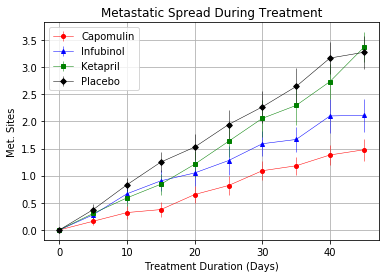

In [16]:
metastic_spread_df=pd.DataFrame({'x': met_pivot_raw['Timepoint'], 'y1': met_pivot_raw['Capomulin'],
                 'y2': met_pivot_raw['Infubinol'],
                 'y3': met_pivot_raw['Ketapril'],
                 'y4': met_pivot_raw['Placebo'],
                 'yerr1': met_sem_pivot_raw['Capomulin'],
                 'yerr2': met_sem_pivot_raw['Infubinol'],
                 'yerr3': met_sem_pivot_raw['Ketapril'],
                 'yerr4': met_sem_pivot_raw['Placebo']})

plt.errorbar( 'x', 'y1', 'yerr1', data=metastic_spread_df, color='red', linestyle='-', linewidth=0.5, marker='o', markersize=4, label='Capomulin')
plt.errorbar( 'x', 'y2', 'yerr2', data=metastic_spread_df, color='blue', linestyle='-', linewidth=0.5, marker='^', markersize=4, label='Infubinol')
plt.errorbar( 'x', 'y3', 'yerr3', data=metastic_spread_df, color='green', linestyle='-', linewidth=0.5, marker='s', markersize=4, label='Ketapril')
plt.errorbar( 'x', 'y4', 'yerr4', data=metastic_spread_df, color='black', linestyle='-', linewidth=0.5, marker='D', markersize=4, label='Placebo')

plt.grid()
plt.legend(prop={'size': 10})
plt.xlabel('Treatment Duration (Days)', size='10')
plt.ylabel('Met. Sites', size='10')
plt.title('Metastatic Spread During Treatment', size='12')
plt.show()

In [17]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


## Survival Rates

In [18]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count = combined_pymasceuticals_df.groupby(['Drug', 'Timepoint'])[['Mouse ID']].count().reset_index()
#mouse_count.head()
# Convert to DataFrame
mouse_count_df = pd.DataFrame(mouse_count)
# Preview DataFrame
#mouse_count_df.head()

In [19]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count_pivot = mouse_count_df.pivot(index='Timepoint', columns='Drug', values='Mouse ID')
mouse_count_pivot_raw = mouse_count_pivot.reset_index()
# Preview the Data Frame
mouse_count_pivot_raw.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,25,25,25,25,25,25,26,25,26,25
1,5,25,21,25,23,23,24,25,25,25,24
2,10,25,20,21,22,21,24,23,24,23,22
3,15,24,19,21,19,21,20,17,24,23,21
4,20,23,18,20,19,20,19,17,23,21,17


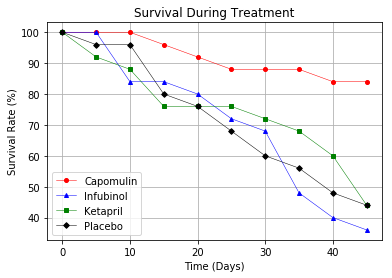

In [20]:
# Generate the Plot (Accounting for percentages)
mouse_count_df=pd.DataFrame({'x': mouse_count_pivot_raw['Timepoint'], 'y1': (mouse_count_pivot_raw['Capomulin']/mouse_count_pivot_raw['Capomulin'].max())*100,
                 'y2': (mouse_count_pivot_raw['Infubinol']/mouse_count_pivot_raw['Infubinol'].max())*100,
                 'y3': (mouse_count_pivot_raw['Ketapril']/mouse_count_pivot_raw['Ketapril'].max())*100,
                 'y4': (mouse_count_pivot_raw['Placebo']/mouse_count_pivot_raw['Placebo'].max())*100})
                 #'yerr1': met_sem_pivot_raw['Capomulin'],
                 #'yerr2': met_sem_pivot_raw['Infubinol'],
                 #'yerr3': met_sem_pivot_raw['Ketapril'],
                 #'yerr4': met_sem_pivot_raw['Placebo']})

plt.plot( 'x', 'y1', data=mouse_count_df, color='red', linestyle='-', linewidth=0.5, marker='o', markersize=4, label='Capomulin')
plt.plot( 'x', 'y2', data=mouse_count_df, color='blue', linestyle='-', linewidth=0.5, marker='^', markersize=4, label='Infubinol')
plt.plot( 'x', 'y3', data=mouse_count_df, color='green', linestyle='-', linewidth=0.5, marker='s', markersize=4, label='Ketapril')
plt.plot( 'x', 'y4', data=mouse_count_df, color='black', linestyle='-', linewidth=0.5, marker='D', markersize=4, label='Placebo')

plt.grid()
plt.legend(prop={'size': 10})
plt.xlabel('Time (Days)', size='10')
plt.ylabel('Survival Rate (%)', size='10')
plt.title('Survival During Treatment', size='12')

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [21]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [22]:
tumor_volume_change = combined_pymasceuticals_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean()
tumor_volume_change_df = pd.DataFrame(tumor_volume_change)
percent_change = tumor_volume_change_df.apply(lambda x: x.div(x.iloc[0]).subtract(1).mul(100))
percent_change = (percent_change.groupby(['Drug'], as_index=True).last())
percent_change.reset_index()
percent_change['color'] = np.where(percent_change['Tumor Volume (mm3)']>0, 'red', 'green')
percent_change_plot = percent_change.loc[(percent_change.index == 'Capomulin') |
                                         (percent_change.index == 'Infubinol') |
                                         (percent_change.index == 'Ketapril') |
                                         (percent_change.index == 'Placebo')]
percent_change_plot

,Tumor Volume (mm3),color
Drug,,
Capomulin,-19.475303,green
Infubinol,46.123472,red
Ketapril,57.028795,red
Placebo,51.297960,red


In [24]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
#fig.show()

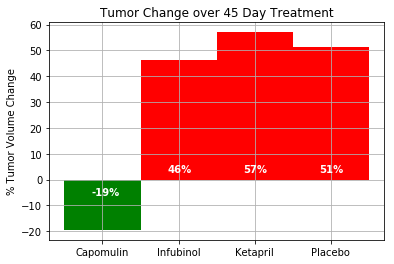

In [40]:
# Make a fake dataset:
height = percent_change_plot['Tumor Volume (mm3)']
bars = percent_change_plot.index
y_pos = np.arange(len(bars))
 
# Create bars
bars = plt.bar(y_pos, height, color=(percent_change_plot['color']), width = 1, align = "edge")

#for bar in bars:
    #yval = bar.get_height()
    #plt.text(bar.get_x(), yval == 0, '{:,.0f}%'.format(yval), ha ='center', va='bottom')
    #plt.text(bar.get_x()+.35, yval, '{:,.0f}%'.format(yval))

for bar in bars:
    yval = bar.get_height()
    pos = 0
    if yval > 0:
        pos = 3
    if yval < 0:
        pos = -6
    plt.text(bar.get_x() + 0.35, pos, '{:,.0f}%'.format(yval), color = 'white', fontweight='bold')
    #plt.text(bar.get_x()+.35, pos, '{:,.0f}%'.format(yval), color = 'black')
plt.grid()

# Create names on the x-axis
LABELS = percent_change_plot.index
plt.xticks(y_pos+.5, LABELS)

#Title and labels
plt.ylabel('% Tumor Volume Change', size='10')
plt.title('Tumor Change over 45 Day Treatment', size='12')
 
# Show graphic
plt.show()
